## Graph Based Dataset
### Louvain’s Algorithm for Community Detection
https://github.com/taynaud/python-louvain

In [4]:
import networkx as nx
import os
import pandas as pd
import json

In [6]:

def load_graph_dataset(data_path="../data/deezer_ego_nets"):
    with open(os.path.join(data_path, "deezer_edges.json")) as f:
        graph = nx.MultiGraph({
            node: [element[1] for element in neighbors]
            for node, neighbors in json.load(f).items()
        })
    target = pd.read_csv(os.path.join(data_path, "deezer_target.csv"))
    return graph, target

graph, target = load_graph_dataset()

In [12]:
len(graph.nodes)

9988

/var/folders/b6/q8hy7lgd7v7glnmnnb18fg1w0000gn/T/ipykernel_28571/3439320185.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(graph.nodes, k)


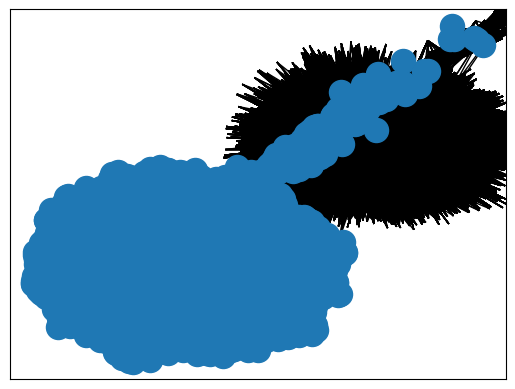

In [25]:
import random
k = 5
sampled_nodes = random.sample(graph.nodes, k)
sampled_graph = graph.subgraph(sampled_nodes)
nx.draw_networkx(graph, arrows=True, with_labels=False)

In [18]:
from community import community_louvain

comms = community_louvain.best_partition(graph)

In [21]:
import numpy as np
unique_coms = np.unique(list(comms.values()))
unique_coms

array([0, 1, 2, 3])

In [22]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

KeyboardInterrupt: 